# Accuracy Measures for Regression Models

The fetch_california_housing function is a utility function provided by scikit-learn to load the California housing dataset, which is a popular regression dataset often used in machine learning tutorials and examples.

The shuffle function is another utility function provided by scikit-learn, which can be used to shuffle the rows of a dataset randomly. This can be useful for ensuring that the data is evenly distributed across cross-validation folds, or for creating a more diverse training set when the original data is sorted or biased in some way.

In [1]:
from sklearn.utils import shuffle
from sklearn.datasets import fetch_california_housing

This code uses the fetch_california_housing function to load the California housing dataset as a Pandas dataframe with the as_frame=True option. It then shuffles the rows of the dataframe randomly using the shuffle function from scikit-learn. The random_state parameter is set to 0 to ensure reproducibility of the results.

Next, the code selects the first 1000 rows of the shuffled dataframe using the head method and assigns the result back to df.

Finally, the head method is called on the resulting dataframe to display the first few rows. This will allow you to verify that the data has been loaded and preprocessed correctly.

Overall, this code loads and preprocesses a subset of the California housing dataset, shuffles the rows randomly, and selects the first 1000 rows for further analysis. The resulting dataframe can be used for training and evaluating a regression model.

In [2]:
df = fetch_california_housing(as_frame=True).frame
df = shuffle(df, random_state=0)
df = df.head(1000)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05,1.369
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97,2.413
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84,2.007
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60,0.725
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43,4.600


The LinearRegression class is a linear regression model provided by scikit-learn. It can be used to fit a linear regression model to a dataset and make predictions based on the input features.

The train_test_split function is a utility function provided by scikit-learn that can be used to split a dataset into training and testing sets. This is a common technique used in machine learning to evaluate the performance of a model on unseen data. The train_test_split function takes the input features and target values as input and returns four arrays: X_train, X_test, y_train, and y_test. The X_train and y_train arrays can be used to fit the model, while the X_test and y_test arrays can be used to evaluate the performance of the model on unseen data.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

This code snippet splits the df dataframe into input features (x) and target variable (y) by dropping the MedHouseVal column from the input features using the drop method with the axis=1 parameter, and selecting the MedHouseVal column as the target variable.

Next, the train_test_split function is used to split the input features and target variable into training and testing sets, with 20% of the data being used for testing. The resulting training and testing sets are stored in x_train, x_test, y_train, and y_test.

A new LinearRegression model is created using the LinearRegression class, and fitted to the training data using the fit method. Finally, the score method is used to evaluate the performance of the model on the testing data, and the resulting R-squared score is returned. The higher the R-squared score, the better the model fits the data.

Overall, this code snippet demonstrates how to split a dataset into training and testing sets, fit a linear regression model to the training data, and evaluate the performance of the model on the testing data.

In [4]:
x = df.drop(["MedHouseVal"], axis=1)
y = df["MedHouseVal"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5863264047398479

Chagne the random state

In [5]:
x = df.drop(["MedHouseVal"], axis=1)
y = df["MedHouseVal"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6255168893408665

This code snippet uses the cross_val_score function from scikit-learn to perform k-fold cross-validation on a linear regression model (model) using the input features (x) and target variable (y).

The cross_val_score function splits the data into k equally sized "folds", trains the model on k-1 folds and evaluates the model on the remaining fold, repeating this process k times such that each fold is used for evaluation exactly once. The function returns an array of scores, where each score represents the performance of the model on one of the k folds.

The cv parameter is used to specify the number of folds. In this case, cv=5 indicates that the data should be split into 5 folds.

The mean() method is then called on the array of scores to calculate the mean score across all folds. This mean score provides an estimate of the model's generalization performance, which is how well the model is expected to perform on new, unseen data.


In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=5).mean()

0.6145211085585904

This code snippet fits a linear regression model (model) to the input features (x) and target variable (y). The fit method is called on the model object and takes x and y as arguments.

The fit method trains the linear regression model on the input features and target variable by estimating the coefficients for each feature. These coefficients can be used to make predictions on new, unseen data.

By calling the fit method on the model object, the linear regression model is trained on the entire dataset (x and y). This means that the model will have learned the relationships between all of the input features and the target variable, and should be able to make predictions on new, unseen data.

Overall, this code snippet demonstrates how to fit a linear regression model to a dataset using the fit method.

In [8]:
model.fit(x,y)

LinearRegression()

# Using Regression to Predict Taxi Fares

This code snippet uses the read_csv function from the pandas library to read a CSV file into a pandas DataFrame.

The CSV file is read from a URL (https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%202/Data/taxi-fares.csv) and contains information about taxi fares, including the pickup and dropoff locations, fare amount, and pickup date and time.

The parse_dates parameter is used to parse the pickup_datetime column as a datetime object. This will allow us to easily manipulate and extract information from the date and time data, such as the day of the week or the hour of the day.

The resulting DataFrame is stored in the variable df and the head method is called to display the first few rows of the DataFrame.

Overall, this code snippet demonstrates how to read a CSV file from a URL into a pandas DataFrame and how to parse a column as a datetime object during the import process.

In [9]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%202/Data/taxi-fares.csv", parse_dates=["pickup_datetime"])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00+00:00,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00+00:00,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,1


This code snippet imports and sets up the plotting library, Seaborn, and configures the Jupyter notebook to display plots inline.

The %matplotlib inline magic command is used to enable inline plotting in the Jupyter notebook. This means that plots will be displayed directly in the notebook output, rather than in a separate window or file.

The matplotlib.pyplot and seaborn libraries are imported with the aliases plt and sns, respectively. These aliases are commonly used in the data science community to make plotting code more concise and easier to read.

The sns.set() function is called to set the default style and color palette for Seaborn plots. This function can be used to customize the appearance of plots, such as changing the background color, font sizes, or line styles.

Overall, this code snippet demonstrates how to set up the Jupyter notebook for inline plotting and how to import and configure the Seaborn library for data visualization.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

This code snippet uses the countplot function from the Seaborn library to create a bar plot of the number of taxi rides with each number of passengers.

The countplot function takes a pandas Series or DataFrame column as input and automatically computes the count of each unique value in the column. In this case, we pass in the passenger_count column of the df DataFrame.

The resulting plot shows a bar for each number of passengers (from 1 to 6), with the height of the bar representing the count of taxi rides with that number of passengers.

Overall, this code snippet demonstrates how to use Seaborn to create a bar plot of the count of each unique value in a column of a pandas DataFrame.

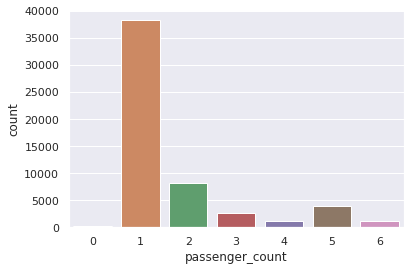

In [11]:
sns.countplot(x=df["passenger_count"])

This code snippet filters the df DataFrame to include only taxi rides with a single passenger and drops the key and passenger_count columns.

The first line of code uses boolean indexing to filter the DataFrame to include only rows where the passenger_count column is equal to 1. This reduces the size of the DataFrame and simplifies the subsequent analysis.

The second line of code uses the drop method to remove the key and passenger_count columns from the DataFrame. The axis=1 parameter indicates that we want to drop columns (as opposed to rows), and the resulting DataFrame is stored back in the df variable.

The head method is called to display the first few rows of the resulting DataFrame, which now only includes information about taxi rides with a single passenger.

In [12]:
df = df[df["passenger_count"]==1]
df = df.drop(["key", "passenger_count"], axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247
2,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328
4,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162
5,15.3,2011-12-09 20:03:00+00:00,-73.973500,40.792610,-73.936035,40.856548
8,7.7,2011-04-02 01:05:15+00:00,-73.979564,40.735405,-73.955686,40.768065


This code snippet uses the shape attribute of a pandas DataFrame to get the number of rows and columns in the df DataFrame.

The shape attribute returns a tuple with two elements: the number of rows (i.e., the length of the first dimension) and the number of columns (i.e., the length of the second dimension).

By calling df.shape, we can see the dimensions of the filtered DataFrame after removing taxi rides with more than one passenger and dropping the key and passenger_count columns. The output will be in the format of (rows, columns).

In [13]:
df.shape

(38233, 6)

This code snippet computes the correlation matrix of the df DataFrame and displays the correlation values between the fare_amount column and all other columns in descending order.

The first line of code computes the correlation matrix of the DataFrame using the corr method. This method computes the pairwise correlation between all columns in the DataFrame by default, using the Pearson correlation coefficient.

The second line of code selects the correlation values between the fare_amount column and all other columns in the DataFrame. It uses the bracket notation to select the fare_amount column and the sort_values method to sort the resulting correlation values in descending order.

The resulting output shows the correlation values between the fare_amount column and all other columns in the DataFrame, sorted in descending order. The correlation values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

In [16]:
coor_matrix = df.corr()
coor_matrix["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
dropoff_longitude    0.020438
pickup_longitude     0.015742
pickup_latitude     -0.015915
dropoff_latitude    -0.021711
Name: fare_amount, dtype: float64

This code imports the sqrt function from the math module in Python.

The sqrt function is a built-in function in the math module that returns the square root of a given number. It takes a single argument, which is the number to be square rooted, and returns the result as a float.

In this case, the sqrt function is likely being used in some later computation involving the x and y variables.

In [17]:
from math import sqrt

Here are the steps that the code is doing for each row of the DataFrame:

- It gets the pickup_datetime value from the row and assigns it to a variable dt.
- It calculates the day of the week for the pickup datetime by calling the weekday() method on dt and assigns it to a new column "day_of_week" in the row.
- It calculates the hour of the pickup time by getting the hour attribute of dt and assigns it to a new column "pickup_time" in the row.
- It calculates the distance between the pickup and dropoff locations by calculating the difference in longitude and latitude, converting those differences to miles using a conversion factor of 54.6 and 69 respectively, and then calculating the distance using the Pythagorean theorem. 
- The resulting distance is then assigned to a new column "distance" in the row.

In [20]:
for i, row in df.iterrows():
  dt = row["pickup_datetime"]
  df.at[i, "day_of_week"] = dt.weekday()
  df.at[i, "pickup_time"] = dt.hour
  x = (row["dropoff_longitude"] - row["pickup_longitude"]) * 54.6
  y = (row["dropoff_latitude"] - row["pickup_latitude"]) * 69
  distance = sqrt(x**2 + y**2)
  df.at[i, "distance"] = distance

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,pickup_time,distance
0,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,6.0,17.0,0.720497
2,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,0.0,15.0,1.038136
4,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,5.0,10.0,2.924341
5,15.3,2011-12-09 20:03:00+00:00,-73.973500,40.792610,-73.936035,40.856548,4.0,20.0,4.862893
8,7.7,2011-04-02 01:05:15+00:00,-73.979564,40.735405,-73.955686,40.768065,5.0,1.0,2.603493


This code snippet drops several columns from the df DataFrame using the drop method and sets the inplace parameter to True to modify the DataFrame in place.

The drop method is used to remove columns from the DataFrame, and the columns parameter is used to specify the column names to be removed. In this case, the method is called with the list ["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"] as the columns parameter, which specifies the names of the columns to be dropped.

The inplace parameter is set to True to modify the DataFrame in place, rather than returning a new DataFrame with the specified columns dropped.

The resulting DataFrame will have the same rows as the original DataFrame, but with the specified columns removed. The head method is then called to display the first few rows of the resulting DataFrame.

In [21]:
df.drop(columns=["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"], inplace=True)
df.head()

,fare_amount,day_of_week,pickup_time,distance
0,7.0,6.0,17.0,0.720497
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493


This code computes the correlation matrix of the df DataFrame using the corr method and computes the correlation between the "fare_amount" column and the other columns in the DataFrame by selecting the "fare_amount" column from the correlation matrix using indexing and sorting the resulting Series in descending order.

The corr method is used to compute the pairwise correlations between the columns of the DataFrame. The resulting object is a DataFrame with the same columns and rows as the original DataFrame, but with the values replaced by the corresponding correlation coefficients.

The resulting correlation matrix is assigned to the variable coor_matrix, and the correlation between the "fare_amount" column and the other columns is computed by selecting the "fare_amount" column from the correlation matrix using coor_matrix["fare_amount"]. The resulting object is a Series with the correlation coefficients between "fare_amount" and the other columns.

The sort_values method is then used to sort the resulting Series in descending order based on the correlation coefficients, which allows us to see which features are most strongly correlated with "fare_amount". The resulting Series is displayed using the print function.

In [22]:
# Check Correlation Again
coor_matrix = df.corr()
coor_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.045873
day_of_week    0.009196
pickup_time   -0.019722
Name: fare_amount, dtype: float64

The describe() method is used to generate descriptive statistics for the numerical columns in a DataFrame. It provides a summary of the central tendency, dispersion, and shape of the distribution of a dataset, excluding NaN values. Here is the result of running df.describe() on the df DataFrame:

Here are the statistics provided for each column:

- count: the number of non-missing values in the column.
- mean: the arithmetic mean (average) of the values in the column.
- std: the standard deviation of the values in the column.
- min: the smallest value in the column.
- 25%: the 25th percentile (first quartile) of the values in the column.
- 50%: the 50th percentile (second quartile or median) of the values in the column.
- 75%: the 75th percentile (third quartile) of the values in the column.
- max: the largest value in the column.

The describe() method is useful for getting a quick overview of the distribution of the data in a DataFrame.

In [23]:
df.describe()

,fare_amount,day_of_week,pickup_time,distance
count,38233.000000,38233.000000,38233.000000,38233.000000
mean,11.214115,2.951534,13.387989,12.018397
std,9.703149,1.932809,6.446519,217.357022
min,-22.100000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.762116
50%,8.500000,3.000000,14.000000,1.331326
75%,12.500000,5.000000,19.000000,2.402226
max,256.000000,6.000000,23.000000,4923.837280


This dataset contains outliers, and outliers frequently skew the results of machine learning models.

Filter the dataset by eliminating negative fare amounts and placing resonable limits on fares and distance, and then run the coorelation again.

In [24]:
df = df[(df["distance"] > 1.0) & (df["distance"] < 10.0)]
df = df[(df["fare_amount"] > 0.0) & (df["fare_amount"] < 50.0)]

# Check Correlation Again
coor_matrix = df.corr()
coor_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.851913
day_of_week   -0.003570
pickup_time   -0.023085
Name: fare_amount, dtype: float64

This code defines x and y as the feature and target columns of the dataset df, respectively. Specifically, x is created by dropping the fare_amount column using the drop() method of the pandas DataFrame object, and y is set to the fare_amount column.

Afterwards, a LinearRegression object is instantiated as model. Finally, cross_val_score() is called with the model, x, y, and cv=5 as arguments. This function performs 5-fold cross-validation and returns an array of scores, one for each fold. The mean() method is called on this array to compute the average score across all folds.

In [25]:
x = df.drop(["fare_amount"], axis=1)
y = df["fare_amount"]
model = LinearRegression()
cross_val_score(model, x, y, cv=5).mean()

0.7258845061910318

This code defines model as a RandomForestRegressor object with a random_state of 0. It then uses cross_val_score() to perform 5-fold cross-validation on the data x and y using the model with cv=5 and computes the average score across all folds with mean().

Since this is a regression problem, the score is the R-squared (coefficient of determination) value, which measures the proportion of the variance in the target variable (y) that is predictable from the features (x). A higher R-squared value indicates a better fit of the model to the data.

In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
cross_val_score(model, x, y, cv=5).mean()

0.706157807448991